In [98]:
import csv
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=[]):
        if(logs['accuracy']>0.85):
            print("I'm done here. Going home")
            self.model.stop_training = True

callbacks = MyCallbacks()

def bar_chart(set, feature):
    survived = set[set['Survived']==1][feature].value_counts()
    notsurvived = set[set['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,notsurvived])
    df.index = ['Survived','Not Survived']
    df.plot(kind = 'bar',stacked=True,figsize=(9,5))

In [42]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:

def prepare_data(obj_df):
    obj_df["Sex"] = obj_df["Sex"].astype('category')
    obj_df["Embarked"] = obj_df["Embarked"].astype('category')

    obj_df["Sex_cat"] = obj_df["Sex"]
    obj_df["Embarked_cat"] = obj_df["Embarked"]

    obj_df["Sex"] = obj_df["Sex"].cat.codes
    obj_df["Embarked"] = obj_df["Embarked"].cat.codes

    obj_df["Age_old"] = obj_df["Age"]
    obj_df["Age"] = obj_df["Age"] / 100

    return (obj_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], obj_df['Survived'])

def prepare_test_data(obj_df):
    obj_df["Sex"] = obj_df["Sex"].astype('category')
    obj_df["Embarked"] = obj_df["Embarked"].astype('category')

    obj_df["Sex_cat"] = obj_df["Sex"]
    obj_df["Embarked_cat"] = obj_df["Embarked"]

    obj_df["Sex"] = obj_df["Sex"].cat.codes
    obj_df["Embarked"] = obj_df["Embarked"].cat.codes

    obj_df["Age_old"] = obj_df["Age"]
    obj_df["Age"] = obj_df["Age"] / 100
    
    return (obj_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])


In [91]:
train_data, train_labels = prepare_data(train.copy())
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


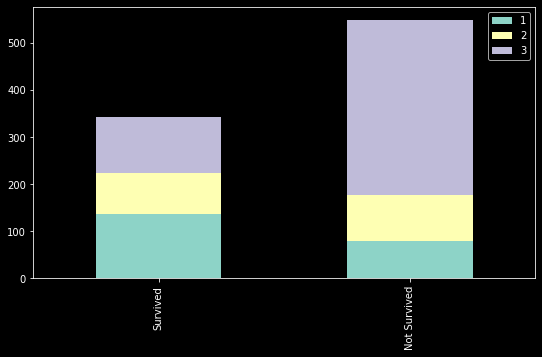

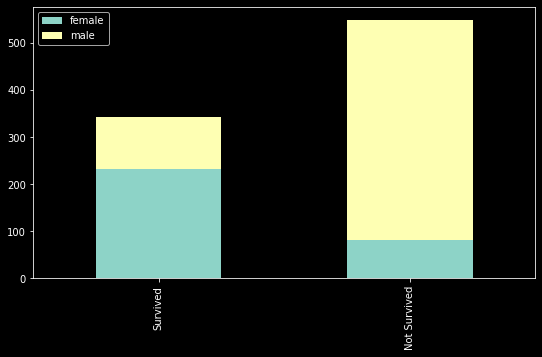

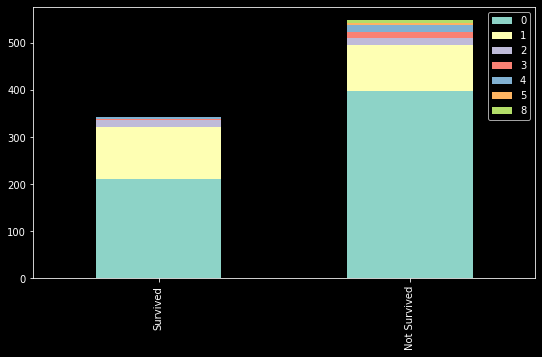

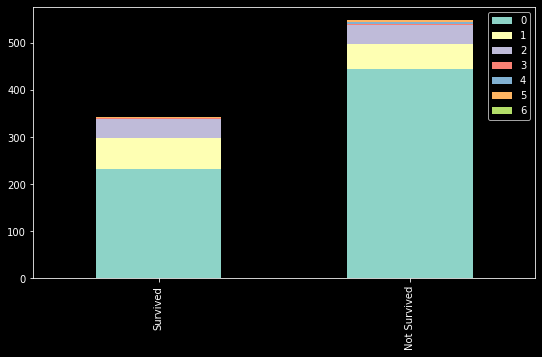

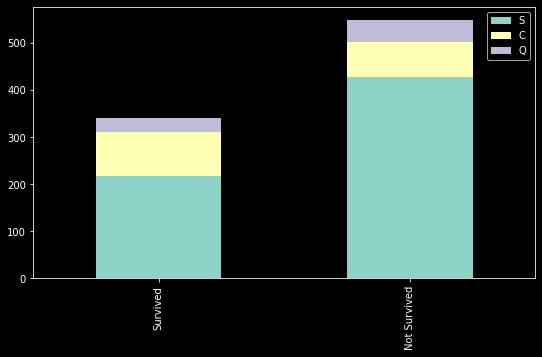

In [96]:
bar_chart(train, 'Pclass')
bar_chart(train, 'Sex')
bar_chart(train, 'SibSp')
bar_chart(train, 'Parch')
bar_chart(train, 'Embarked')


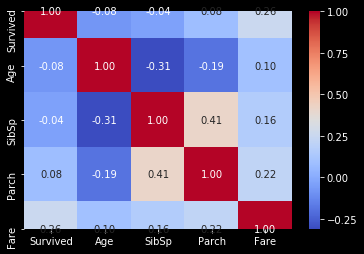

In [100]:
C_matrix = sns.heatmap(train[['Survived', 'Age', 'SibSp',
       'Parch',  'Fare']].corr(),
                       annot=True,fmt='.2f',cmap ='coolwarm')

In [76]:
reserve_val = 50
val_data = train_data[-reserve_val:]
val_labels = train_labels[-reserve_val:]
train_data = train_data[:-reserve_val]
train_labels = train_labels[:-reserve_val]

In [87]:
train_data[train_data.isnull().any(axis=1)]

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [81]:
model = tf.keras.models.Sequential([keras.layers.Dense(32, input_dim=6, activation='relu', kernel_initializer='he_uniform'), 
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

Train on 741 samples, validate on 50 samples
Epoch 1/50
741/741 [==============================] - 0s 420us/sample - loss: 0.7255 - accuracy: 0.6140 - val_loss: 0.6885 - val_accuracy: 0.6400
Epoch 2/50
741/741 [==============================] - 0s 113us/sample - loss: 0.6880 - accuracy: 0.6113 - val_loss: 0.6840 - val_accuracy: 0.6400
Epoch 3/50
741/741 [==============================] - 0s 103us/sample - loss: 0.6847 - accuracy: 0.6113 - val_loss: 0.6804 - val_accuracy: 0.6400
Epoch 4/50
741/741 [==============================] - 0s 94us/sample - loss: 0.6819 - accuracy: 0.6113 - val_loss: 0.6767 - val_accuracy: 0.6400
Epoch 5/50
741/741 [==============================] - 0s 97us/sample - loss: 0.6797 - accuracy: 0.6113 - val_loss: 0.6742 - val_accuracy: 0.6400
Epoch 6/50
741/741 [==============================] - 0s 99us/sample - loss: 0.6777 - accuracy: 0.6113 - val_loss: 0.6710 - val_accuracy: 0.6400
Epoch 7/50
741/741 [==============================] - 0s 100us/sample - loss: 0.67

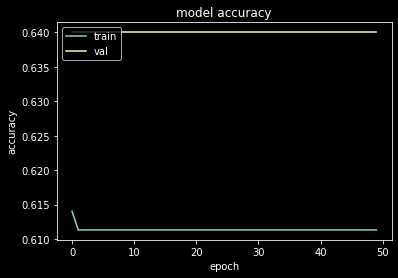

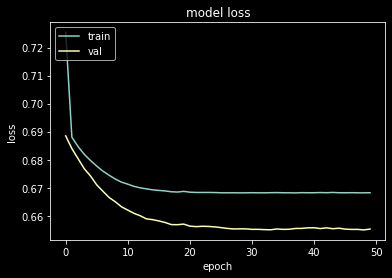

In [82]:
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()